# *Olympics Data Analysis*
## *Data-driven Insights*:

Utilize data science and machine learning techniques to derive valuable insights from Olympic-related data. This could involve analyzing historical event data, athlete profiles, sports statistics, social media sentiment analysis, or other relevant datasets to provide unique perspectives or predictive analytics.

# Analysis preparation

We initialize the packages that we will use in the analysis.


In [5]:
!pip install vaderSentiment
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.simplefilter("ignore")
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
!pip install chart_studio > /dev/null
!pip install plotly_express==0.4.0
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import wordcloud
import plotly_express as px
from matplotlib import cm
from pprint import pprint
import plotly.io as pio
pio.templates.default = "plotly_dark"
pd.options.plotting.backend = "plotly"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.5 MB/s eta 0:00:00


In [7]:
data_df = pd.read_csv("tokyo_2020_tweets.csv")

In [8]:
data_df.head()



,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1420000000000000000.0,Abhishek Srivastav,"Udupi, India",Trying to be mediocre in many things,01-02-2021 06:33,45.0,39.0,293.0,False,24-07-2021 10:59,Let the party begin\n#Tokyo2020,['Tokyo2020'],Twitter for Android,0.0,0.0,False
1,1420000000000000000.0,Saikhom Mirabai Channu🇮🇳,"Manipur, India",Indian weightlifter 48 kg category. Champion🏆,07-04-2018 10:10,5235.0,5.0,2969.0,False,24-07-2021 10:58,Congratulations #Tokyo2020 https://t.co/8OFKMs...,['Tokyo2020'],Twitter for Android,0.0,0.0,False
2,1420000000000000000.0,Big Breaking,Global,All breaking news related to Financial Market....,29-05-2021 08:51,3646.0,3.0,5.0,False,24-07-2021 10:58,Big Breaking Now \n\nTokyo Olympic Update \n\n...,NaN,Twitter for Android,0.0,1.0,False
3,1420000000000000000.0,International Hockey Federation,Lausanne,Official International Hockey Federation Twitt...,20-10-2010 10:45,103975.0,2724.0,36554.0,True,24-07-2021 10:57,Q4: 🇬🇧3-1🇿🇦\n\nGreat Britain finally find a wa...,NaN,Twitter Web App,1.0,0.0,False
4,1420000000000000000.0,Cameron Hart,Australia,Football & Tennis Coach,31-10-2020 08:46,6.0,37.0,31.0,False,24-07-2021 10:52,All I can think of every time I watch the ring...,"['Tokyo2020', 'ArtisticGymnastics', '7Olympics...",Twitter for iPhone,0.0,0.0,False


In [9]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

# Data visualization


We will use wordclouds to identify the most frequent words in the titles and body of the posts.

We will remove frequent used words, like "vaccine", "vaccination", some bad words as well as "Comment" which is a keyword we used for the title of comments (vs. messages, that have also a title)

In [10]:
  def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U", "Olympics" "Tokyo2020", "TokyoOlympics", "Olympic", "Olympics Tokyo2020", "Tokyo2020 Olympics"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

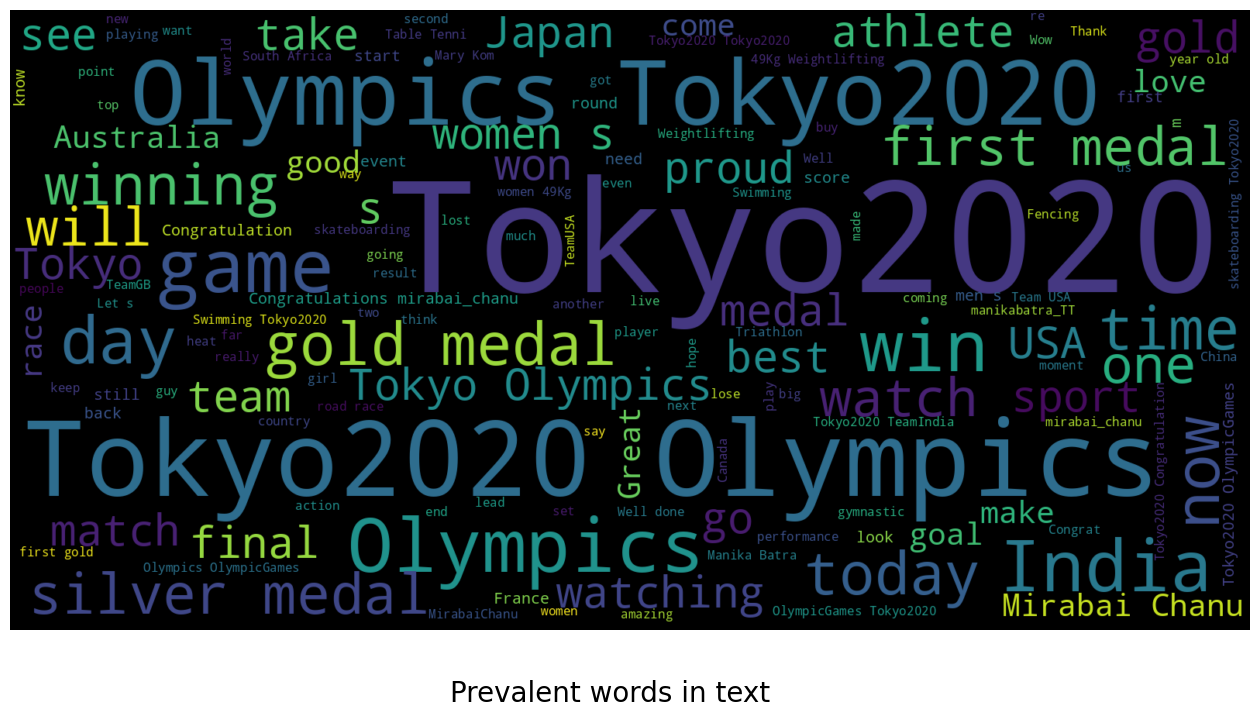

In [11]:
show_wordcloud(data_df['text'], title = 'Prevalent words in text')

In [12]:
sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral"

In [13]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}")
    plt.tight_layout()
    plt.show()

In [14]:
data_df['text_sentiment'] = data_df['text'].apply(lambda x: find_sentiment(x))
plot_sentiment(data_df, 'text_sentiment', 'Text')

TypeError: ignored

In [15]:
show_wordcloud(data_df.loc[data_df['text_sentiment']=='Positive', 'text'], title = 'Prevalent words in texts (Positive sentiment)')

KeyError: ignored

In [ ]:
show_wordcloud(data_df.loc[data_df['text_sentiment']=='Negative', 'text'], title = 'Prevalent words in texts (Negative sentiment)')

In [ ]:
show_wordcloud(data_df.loc[data_df['text_sentiment']=='Neutral', 'text'], title = 'Prevalent words in texts (Neutral sentiment)')


In [ ]:
df = pd.read_csv('athlete_events.csv')

In [ ]:
df.head()

## Question 1: How many players were there in each sport?

In [ ]:
#How many unique players are there in each sport?
sport_players = df.groupby('Sport').nunique('Name')['Name']
wc_count = sport_players.to_dict()
pprint(wc_count)

In [ ]:
top_25_sports = sport_players.sort_values(ascending=False).iloc[:25]
color_scale = np.log10(1+top_25_sports)
fig = top_25_sports.plot(kind='bar', color=color_scale, labels={'value':'Nº Unique Athletes'}, title="Top 25 Sports by Number of Athletes")
fig.update(layout_coloraxis_showscale=False)

In [ ]:
wc = wordcloud.WordCloud(width=1000, height=500,colormap='Dark2', background_color='white', min_font_size=10).generate_from_frequencies(wc_count)

In [ ]:
arr = wc.to_array()

def show_image(arr):
    fig = px.imshow(arr)
    #layout = go.Layout(plot_bgcolor='rgba(0,0,0,0)')
    fig.update_layout(dict(plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='rgba(0,0,0,0)'), autosize=False, width=1000, height=500, margin=dict(l=0,r=0,b=0,t=0))
    fig.update_xaxes(showline=False,showticklabels=False)
    fig.update_yaxes(showline=False,showticklabels=False)
    fig.show()
show_image(arr)

In [ ]:
medal_df = df.loc[:,['Name','Medal']]
pivot_table = medal_df.pivot_table(index='Name', columns='Medal', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

In [ ]:
pivot_table.sort_values(by='Total', inplace=True, ascending=False)
pivot_table

In [ ]:
pivot_table.iloc[:25].drop('Total',axis=1).plot(kind='bar',y=['Bronze','Silver','Gold'])

## Question 3: What is the distribution of ages between the competitors


In [ ]:
age_df = df.loc[:,['Name','Age','Sex','Sport']]


In [ ]:
fig = go.Figure()

trace_all = go.Histogram(x=age_df.Age,name='all', showlegend=True, marker_color="firebrick")
fig.add_trace(trace_all)
trace_male = go.Histogram(x=age_df.loc[age_df['Sex']=='M'].Age,name="male", visible=False)
fig.add_trace(trace_male)
trace_female = go.Histogram(x=age_df.loc[age_df['Sex']=='F'].Age,name="female", visible=False)
fig.add_trace(trace_female)

buttons = [
    dict(
        label="All",
        method="update",
        args=[
            {'visible':[True,False,False], 'marker.color':'firebrick'}, {'title':'All','showlegend':True}
        ]
    ),
    dict(
        label="Male",
        method="update",
        args=[
            {'visible':[False,True,False], 'marker.color':'steelblue'}, {'title':'Male','showlegend':True}
        ]
    ),
    dict(
        label="Female",
        method="update",
        args=[
            {'visible':[False,False,True],'marker.color':'orchid'}, {'title':'Female','showlegend':True }
        ]
    )
]

fig.update_layout(
    title="All",
    template='plotly_dark',
    updatemenus=[
        go.layout.Updatemenu(
            active=0,
            buttons=buttons
        )
    ]
)



In [ ]:
age_df.loc[age_df['Age']>60,'Sport'].value_counts().plot(kind='bar', labels={'index':'Sport','value':'Count'}, title="Number of athletes above age 60 for each sport")

## Question 4: Distribution of Heights on some sports

In [ ]:
def plot_distribution_filters(df, dist_column, filter_column, filter_values=None, n_bins=20):
    #getting distinct filter column values
    df = df[~df[dist_column].isna()]
    if not filter_values:
        filter_values =df[filter_column].value_counts()[df[filter_column].value_counts()>1000].sort_index().index.tolist()

    fig = go.Figure()
    #---Adding Traces---#
    traces = [go.Histogram(x=df[dist_column], showlegend=True, nbinsx=n_bins, name='All')]
    traces.extend([go.Histogram(x=df.loc[df[filter_column]==filter_value,dist_column], visible=False, nbinsx=n_bins, name=filter_value,showlegend=True) for filter_value in filter_values])
    fig.add_traces(traces)
    #Creating Buttons
    n = len(traces)
    #Visible arguments creation
    visible_list = [[i==j for i in range(n)] for j in range(n)]

    #All Values
    filter_values.insert(0,'All')
    buttons = [
        dict(
            label=filter_value,
            method='update',
            args=[{'visible': visible_list[i]}]
        )
        for i,filter_value in enumerate(filter_values)
    ]
    fig.update_layout(
        title='Height Distribution for Sports',
        updatemenus = [
            go.layout.Updatemenu(
                active=0,
                buttons=buttons
            )
        ]
    )
    fig.show()

plot_distribution_filters(df,'Height','Sport')




## Question 5: Distribution of Weights on Sports

In [ ]:
plot_distribution_filters(df,'Weight','Sport')

# Question 6: Distribution age sports

In [ ]:
plot_distribution_filters(df,'Age','Sport')

## Question 7: Correlate Athelete Features and Wins on Different Sports

In [ ]:
from scipy.stats import pointbiserialr

def athelete_feature_win_correlation(df, feature, sport):
    df = df.copy()
    df = df[df['Sport']==sport]
    df['won_medal'] = df['Medal'].isna().map({True:0,False:1})
    df_corr = df.loc[:,['won_medal',feature]]
    df_corr.dropna(inplace=True)
    result=pointbiserialr(df_corr['won_medal'].values,df_corr[feature].values)
    return result


In [ ]:
athelete_feature_win_correlation(df,'Height','Basketball')

In [ ]:
def hist_feature_win(df,feature,sport):
    df =df.copy()
    df = df[df['Sport']==sport]
    df['won_medal'] = df['Medal'].isna().map({True:0,False:1})
    won = df[df['won_medal']==1]
    lost = df[df['won_medal']==0]
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=won[feature], histnorm='probability', name="Games Won", nbinsx=30))
    fig.add_trace(go.Histogram(x=lost[feature], histnorm='probability', name="Games Lost", nbinsx=30))
    fig.update_layout(
        title=f'Distributions of {feature} for Winning and Losing Players',
        xaxis_title=f'{feature}',
        yaxis_title='Probability'
    )
    fig.show()


In [ ]:
hist_feature_win(df,'Weight','Basketball')